In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

1) Загрузите файл HR.csv в pandas dataframe 

In [2]:
df_HR = pd.read_csv('C:/Users/User/Documents/Python_диплом/HR.csv')

In [3]:
""" 
Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_montly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты
"""

df_HR

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


2) Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [5]:
df_HR.describe().round(3)
#Сразу отразим значения среднего, мин/макс, среднего отклонения. Значения медианы тождественны значениям квантиля 50%

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000
mean,0.613,0.716,3.803,201.050,3.498,0.145,0.238,0.021
std,0.249,0.171,1.233,49.943,1.460,0.352,0.426,0.144
min,0.090,0.360,2.000,96.000,2.000,0.000,0.000,0.000
25%,0.440,0.560,3.000,156.000,3.000,0.000,0.000,0.000
50%,0.640,0.720,4.000,200.000,3.000,0.000,0.000,0.000
75%,0.820,0.870,5.000,245.000,4.000,0.000,0.000,0.000
max,1.000,1.000,7.000,310.000,10.000,1.000,1.000,1.000


In [6]:
#Расчёт моды
mode = df_HR.mode()
mode

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


Таким образом, для среднего кол-ва часов работы в месяц есть 2 значения моды: 135 и 156 часов.
Для остальных показателей значение моды одно.

3) Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные

В датафрейме df_HR - 4 количественные переменные:

Last_evaluation - Время с момента последней оценки в годах

number_projects - Количество проектов, выполненных за время работы

average_monthly_hours - Среднее количество часов на рабочем месте в месяц

time_spend_company - Стаж работы в компании в годах

Остальные переменные (на мой взгляд) нельзя однозначно назвать количественными:

satisfaction_level - величина, о которой мы не можем сказать, сколько значений она может принимать, перечислять её конкретные значения нет смысла. Это порядковая величина: её можно ранжировать и упорядочивать, это осмысленно.

Work_accident, left, promotion_last_5years - величины, где число дано только для определения значений "Да" или "Нет".

department и salary - категориальные величины

Рассчитаем и визуализируем корреляционную матрицу для этих переменных:


In [7]:
#Введём датафрейм df_count для количественных переменных
df_count = df_HR[['last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]
df_count

,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.53,2,157,3
1,0.86,5,262,6
2,0.88,7,272,4
3,0.87,5,223,5
4,0.52,2,159,3
...,...,...,...,...
14994,0.57,2,151,3
14995,0.48,2,160,3
14996,0.53,2,143,3
14997,0.96,6,280,4


В данный момент мы не знаем о том, линейная зависимость между переменными или нет. Тем не менее, начнём
с коэфф-а корреляции Пирсона, и на основании полученной визуализации выдвинем гипотезу.

In [8]:
#Корреляция Пирсона
df_count.corr()

,last_evaluation,number_project,average_montly_hours,time_spend_company
last_evaluation,1.000000,0.349333,0.339742,0.131591
number_project,0.349333,1.000000,0.417211,0.196786
average_montly_hours,0.339742,0.417211,1.000000,0.127755
time_spend_company,0.131591,0.196786,0.127755,1.000000


Для всех переменных построим графики зависимости с помощью sns.pairplot

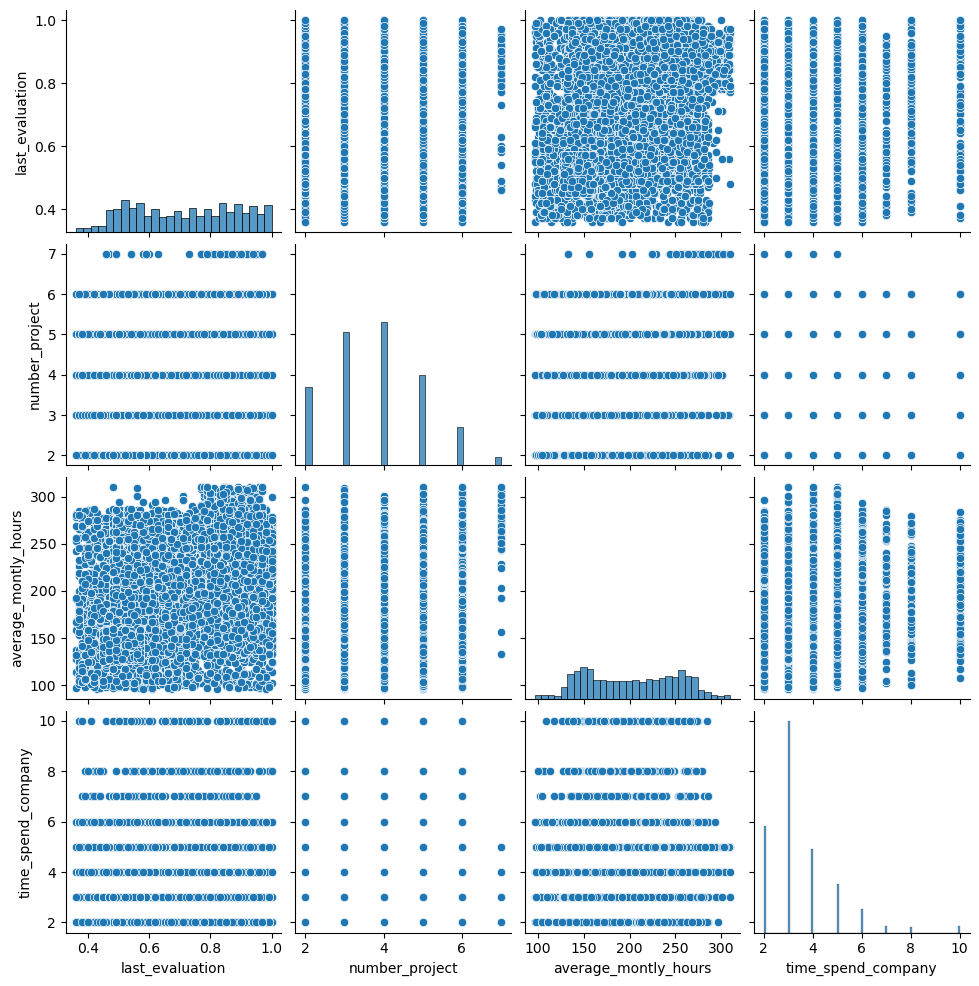

In [9]:
sns.pairplot(df_count)

По данной визуализации сложно судить о линейной зависимости переменных - значения разбросаны очень сильно.
Построим тепловую карту:

<Axes: >

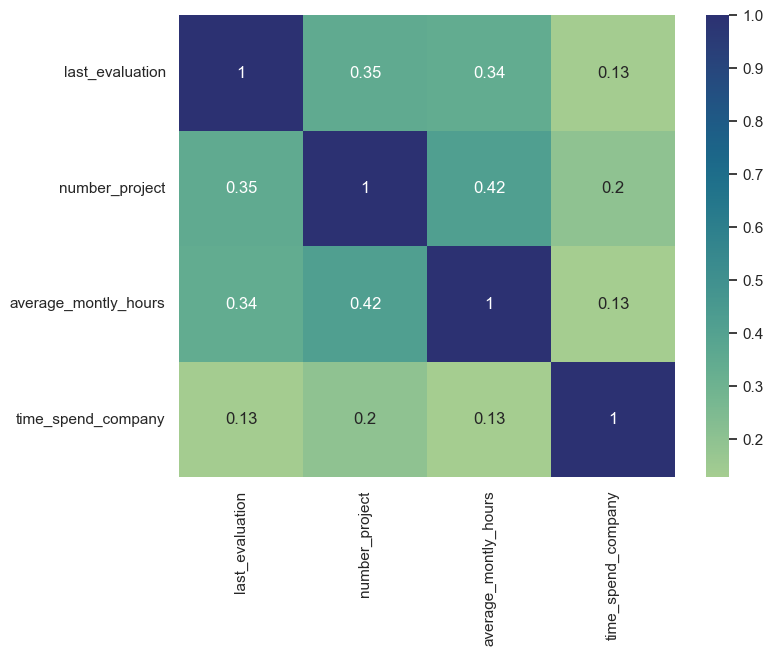

In [10]:
sns.set(rc={'figure.figsize':(8, 6)})
sns.heatmap(df_count.corr(), annot=True, cmap='crest')

В соответствии с данными графиком: 

две самые скоррелированные величины - количество проектов, выполненных за время работы number_projects и среднее количество часов на рабочем месте в месяц average_monthly_hours с коэфф-ом корреляции Пирсона 0.42.
Знак плюс перед значением корреляции указывает на прямую связь между переменными.

две наименее скоррелированные величины - стаж работы в компании в годах time_spend_company и время с момента последней оценки в годах last_evaluation, а также time_spend_company и среднее количество часов на рабочем месте в месяц average_monthly_hours, в обоих случаях коэфф-т корреляции Спирмэна равен 0.13

Для дополнительного подтверждения нашего вывода о самых скоррелированных величинах построим такую же тепловую карту 
для тех же переменных, только с коэфф-ами корреляции Спирмэна и Кендалла:

<Axes: >

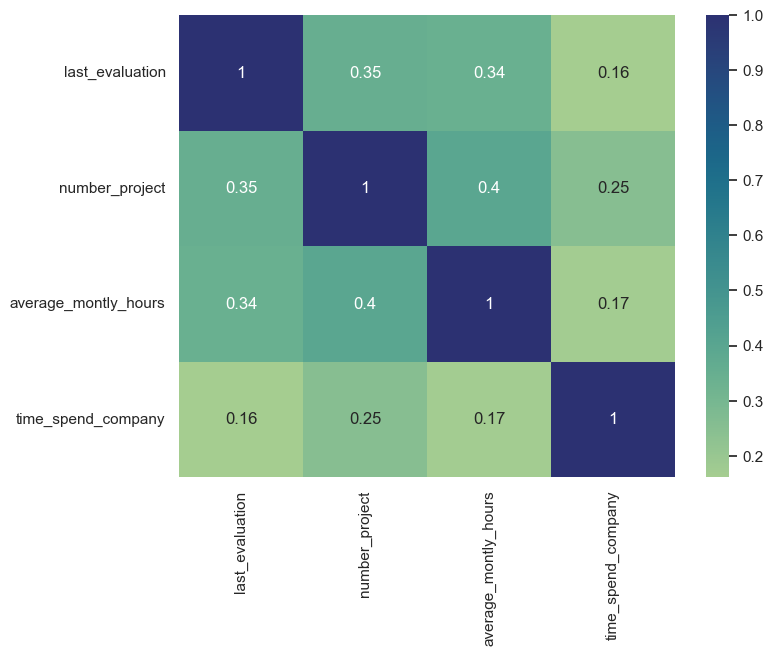

In [11]:
#Тепловая карта с корреляцией Спирмэна
sns.set(rc={'figure.figsize':(8, 6)})
sns.heatmap(df_count.corr(method='spearman'), annot=True, cmap='crest')

В соответствии с данными графиком: 

две самые скоррелированные величины - вновь number_projects и average_monthly_hours с коэфф-ом корреляции Спирмэна 0.4.

две наименее скоррелированные величины - вновь time_spend_company и last_evaluation с коэфф-ом корреляции Спирмэна 0.16.

<Axes: >

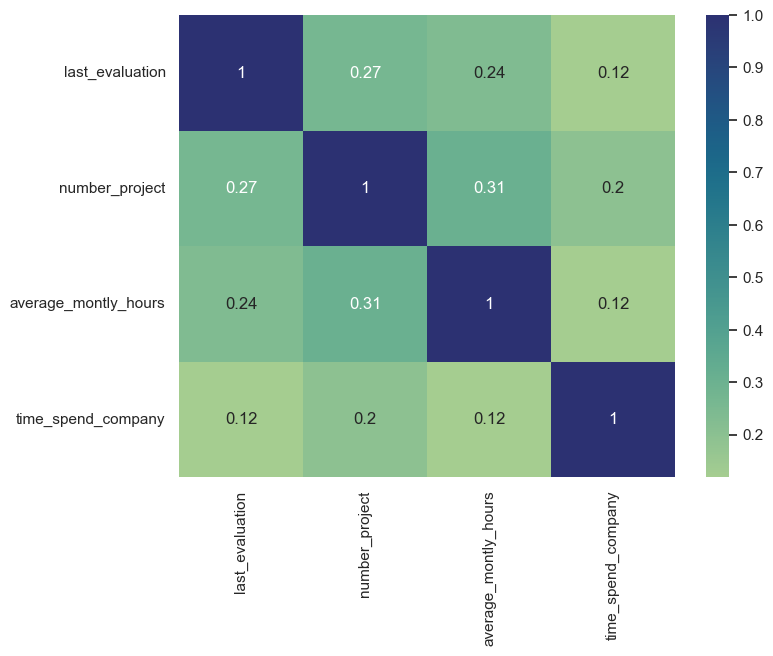

In [12]:
#Тепловая карта с корреляцией Кендалла
sns.set(rc={'figure.figsize':(8, 6)})
sns.heatmap(df_count.corr(method='kendall'), annot=True, cmap='crest')

В соответствии с данным графиком: 

две самые скоррелированные величины - вновь number_projects и average_monthly_hours с коэфф-ом корреляции Спирмэна 0.31.

две наименее скоррелированные величины - вновь time_spend_company и last_evaluation, а также time_spend_company и average_monthly_hours с коэфф-ом корреляции Спирмэна 0.12 в обоих случаях.

Таким образом, при каждом из трёх коэфф-ов корреляции:

самые скоррелированные переменные - number_projects и average_monthly_hours

наименее скоррелированные переменные - time_spend_company и last_evaluation, а также time_spend_company и average_monthly_hours


4) Рассчитайте сколько сотрудников работает в каждом департаменте.

In [13]:
#Воспользуемся функцией value_counts для расчёта количества каждого из значений в колонке department
df_HR['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

5) Показать распределение сотрудников по зарплатам.

In [111]:
#Так как необходимо только количество сотрудников - можем взять в качестве подсчёта любую, например, категориальную величину.
df_salary = df_HR[['salary', 'department']].groupby('salary').count()
df_salary.rename(columns = {'department' : 'Количество сотрудников'}, inplace = True)
df_salary

,Количество сотрудников
salary,
high,1237
low,7316
medium,6446


<Axes: title={'center': 'Распределение сотрудников по зарплатам'}, xlabel='Уровень зарплаты', ylabel='Количество сотрудников'>

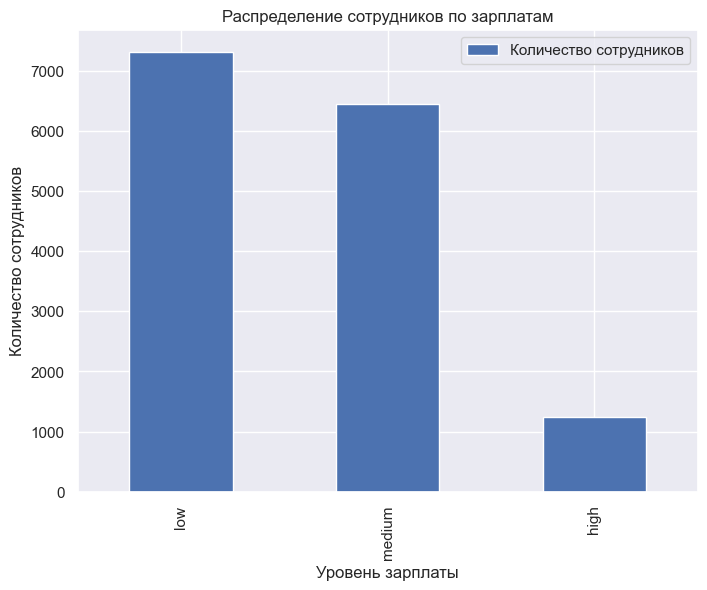

In [17]:
df_salary.sort_values(by='Количество сотрудников', ascending=False).plot(kind='bar',
                                                         title='Распределение сотрудников по зарплатам',
                                                         xlabel='Уровень зарплаты',
                                                         ylabel='Количество сотрудников')

6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [18]:
df_salary_dep = df_HR[['salary', 'department']].value_counts()
df_salary_dep

salary  department 
low     sales          2099
medium  sales          1772
low     technical      1372
medium  technical      1147
low     support        1146
medium  support         942
low     IT              609
medium  IT              535
low     product_mng     451
        marketing       402
medium  product_mng     383
        marketing       376
        RandD           372
low     RandD           364
medium  hr              359
low     accounting      358
        hr              335
medium  accounting      335
high    sales           269
        management      225
medium  management      225
high    technical       201
low     management      180
high    support         141
        IT               83
        marketing        80
        accounting       74
        product_mng      68
        RandD            51
        hr               45
dtype: int64

In [19]:
#Департамент sales
df_salary_dep_sales = df_HR[df_HR['department'] == 'sales']
df_salary_sales = df_salary_dep_sales[['salary', 'department']].groupby('salary').count()
df_salary_sales.rename(columns = {'department' : 'sales'}, inplace = True)
df_salary_sales

,sales
salary,
high,269
low,2099
medium,1772


<Axes: title={'center': 'Распределение сотрудников департамента sales по зарплатам'}, xlabel='Уровень зарплаты', ylabel='Количество сотрудников'>

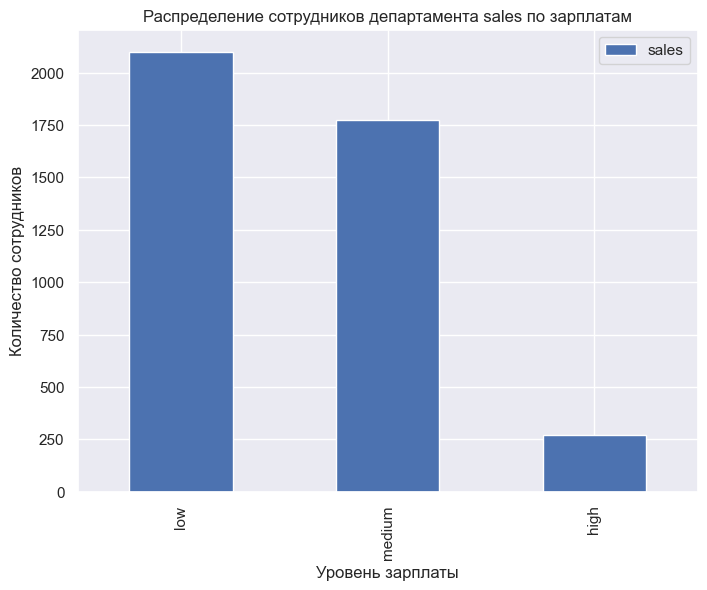

In [20]:
df_salary_sales.sort_values(by='sales', ascending=False).plot(kind='bar',
                                                         title='Распределение сотрудников департамента sales по зарплатам',
                                                         xlabel='Уровень зарплаты',
                                                         ylabel='Количество сотрудников')
#for i, val in enumerate(df_salary_sales.values):
    #plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

In [21]:
#Департамент technical
df_salary_dep_tech = df_HR[df_HR['department'] == 'technical']
df_salary_tech = df_salary_dep_tech[['salary', 'department']].groupby('salary').count()
df_salary_tech.rename(columns = {'department' : 'technical'}, inplace = True)
df_salary_tech

,technical
salary,
high,201
low,1372
medium,1147


<Axes: title={'center': 'Распределение сотрудников департамента technical по зарплатам'}, xlabel='Уровень зарплаты', ylabel='Количество сотрудников'>

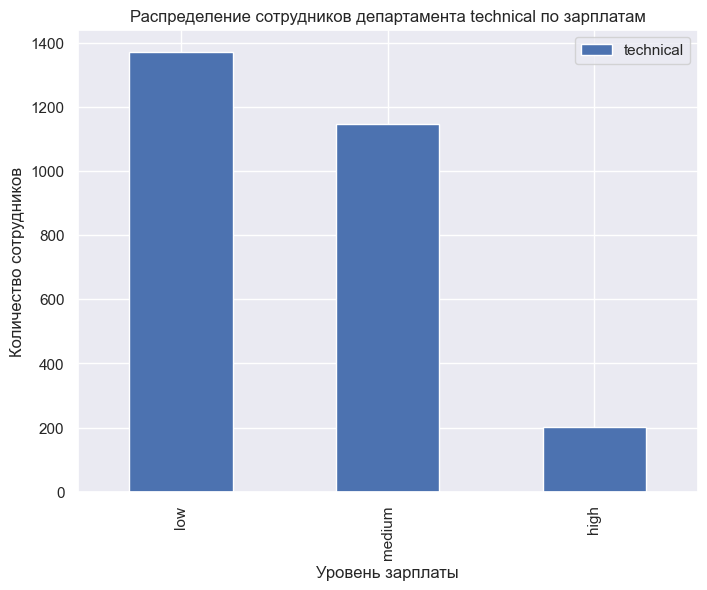

In [22]:
df_salary_tech.sort_values(by='technical', ascending=False).plot(kind='bar',
                                                         title='Распределение сотрудников департамента technical по зарплатам',
                                                         xlabel='Уровень зарплаты',
                                                         ylabel='Количество сотрудников')
#for i, val in enumerate(df_salary_sales.values):
    #plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

In [23]:
#Департамент support
df_salary_dep_sup = df_HR[df_HR['department'] == 'support']
df_salary_sup = df_salary_dep_sup[['salary', 'department']].groupby('salary').count()
df_salary_sup.rename(columns = {'department' : 'support'}, inplace = True)
df_salary_sup

,support
salary,
high,141
low,1146
medium,942


<Axes: title={'center': 'Распределение сотрудников департамента support по зарплатам'}, xlabel='Уровень зарплаты', ylabel='Количество сотрудников'>

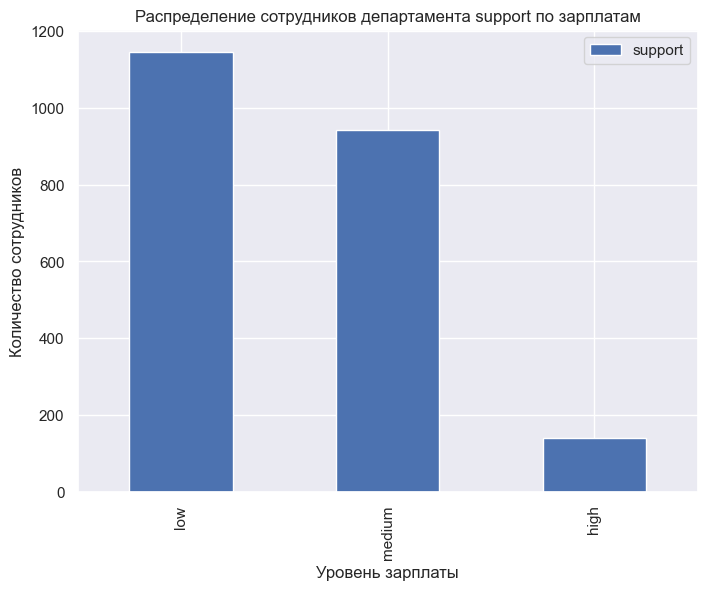

In [24]:
df_salary_sup.sort_values(by='support', ascending=False).plot(kind='bar',
                                                         title='Распределение сотрудников департамента support по зарплатам',
                                                         xlabel='Уровень зарплаты',
                                                         ylabel='Количество сотрудников')
#for i, val in enumerate(df_salary_sales.values):
    #plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

In [25]:
#Департамент support
df_salary_dep_IT = df_HR[df_HR['department'] == 'IT']
df_salary_IT = df_salary_dep_IT[['salary', 'department']].groupby('salary').count()
df_salary_IT.rename(columns = {'department' : 'IT'}, inplace = True)
df_salary_IT

,IT
salary,
high,83
low,609
medium,535


<Axes: title={'center': 'Распределение сотрудников департамента IT по зарплатам'}, xlabel='Уровень зарплаты', ylabel='Количество сотрудников'>

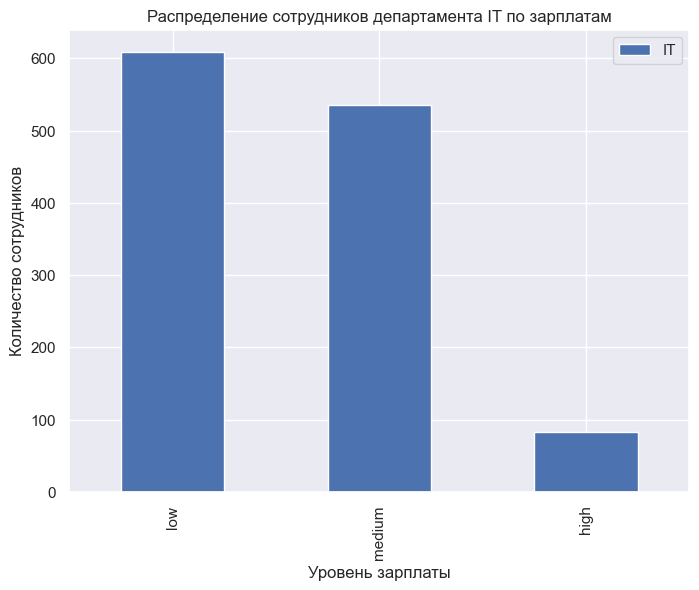

In [26]:
df_salary_IT.sort_values(by='IT', ascending=False).plot(kind='bar',
                                                         title='Распределение сотрудников департамента IT по зарплатам',
                                                         xlabel='Уровень зарплаты',
                                                         ylabel='Количество сотрудников')
#for i, val in enumerate(df_salary_sales.values):
    #plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

In [27]:
df_salary_dep_prod = df_HR[df_HR['department'] == 'product_mng']
df_salary_prod = df_salary_dep_prod[['salary', 'department']].groupby('salary').count()
df_salary_prod.rename(columns = {'department' : 'product_mng'}, inplace = True)
df_salary_prod

,product_mng
salary,
high,68
low,451
medium,383


<Axes: title={'center': 'Распределение сотрудников департамента product_mng по зарплатам'}, xlabel='Уровень зарплаты', ylabel='Количество сотрудников'>

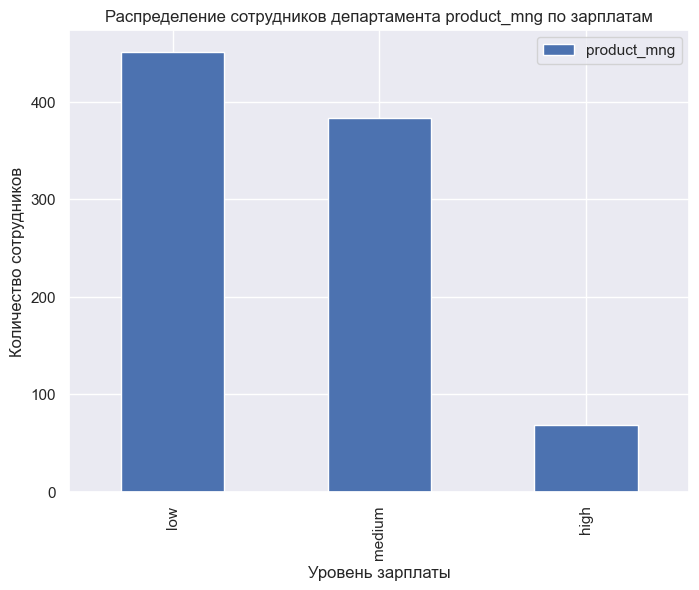

In [28]:
df_salary_prod.sort_values(by='product_mng', ascending=False).plot(kind='bar',
                                                         title='Распределение сотрудников департамента product_mng по зарплатам',
                                                         xlabel='Уровень зарплаты',
                                                         ylabel='Количество сотрудников')
#for i, val in enumerate(df_salary_sales.values):
    #plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

In [29]:
df_salary_dep_market = df_HR[df_HR['department'] == 'marketing']
df_salary_market = df_salary_dep_market[['salary', 'department']].groupby('salary').count()
df_salary_market.rename(columns = {'department' : 'marketing'}, inplace = True)
df_salary_market

,marketing
salary,
high,80
low,402
medium,376


<Axes: title={'center': 'Распределение сотрудников департамента marketing по зарплатам'}, xlabel='Уровень зарплаты', ylabel='Количество сотрудников'>

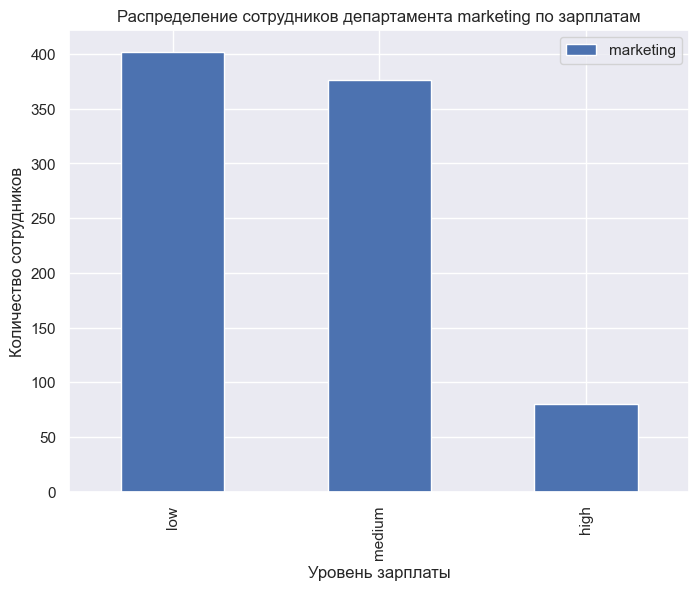

In [30]:
df_salary_market.sort_values(by='marketing', ascending=False).plot(kind='bar',
                                                         title='Распределение сотрудников департамента marketing по зарплатам',
                                                         xlabel='Уровень зарплаты',
                                                         ylabel='Количество сотрудников')
#for i, val in enumerate(df_salary_sales.values):
    #plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

In [31]:
df_salary_dep_RandD = df_HR[df_HR['department'] == 'RandD']
df_salary_RandD = df_salary_dep_RandD[['salary', 'department']].groupby('salary').count()
df_salary_RandD.rename(columns = {'department' : 'RandD'}, inplace = True)
df_salary_RandD

,RandD
salary,
high,51
low,364
medium,372


<Axes: title={'center': 'Распределение сотрудников департамента RandD по зарплатам'}, xlabel='Уровень зарплаты', ylabel='Количество сотрудников'>

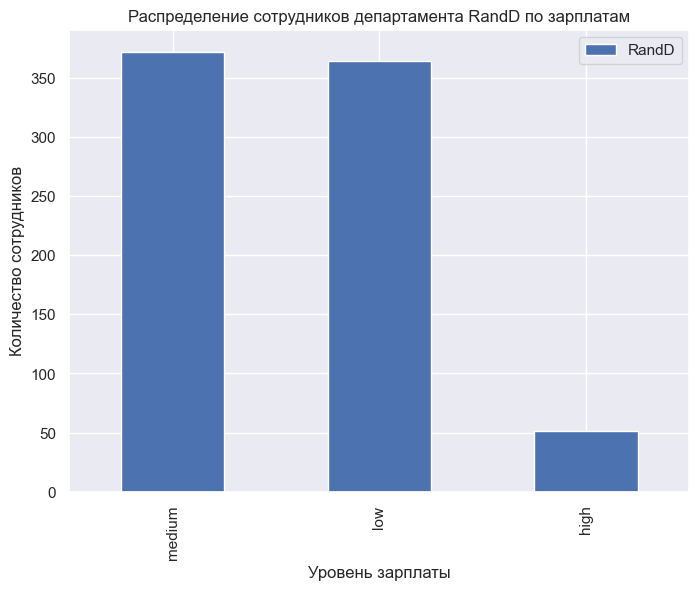

In [32]:
df_salary_RandD.sort_values(by='RandD', ascending=False).plot(kind='bar',
                                                         title='Распределение сотрудников департамента RandD по зарплатам',
                                                         xlabel='Уровень зарплаты',
                                                         ylabel='Количество сотрудников')
#for i, val in enumerate(df_salary_sales.values):
    #plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

In [33]:
df_salary_dep_acc = df_HR[df_HR['department'] == 'accounting']
df_salary_acc = df_salary_dep_acc[['salary', 'department']].groupby('salary').count()
df_salary_acc.rename(columns = {'department' : 'accounting'}, inplace = True)
df_salary_acc

,accounting
salary,
high,74
low,358
medium,335


<Axes: title={'center': 'Распределение сотрудников департамента accounting по зарплатам'}, xlabel='Уровень зарплаты', ylabel='Количество сотрудников'>

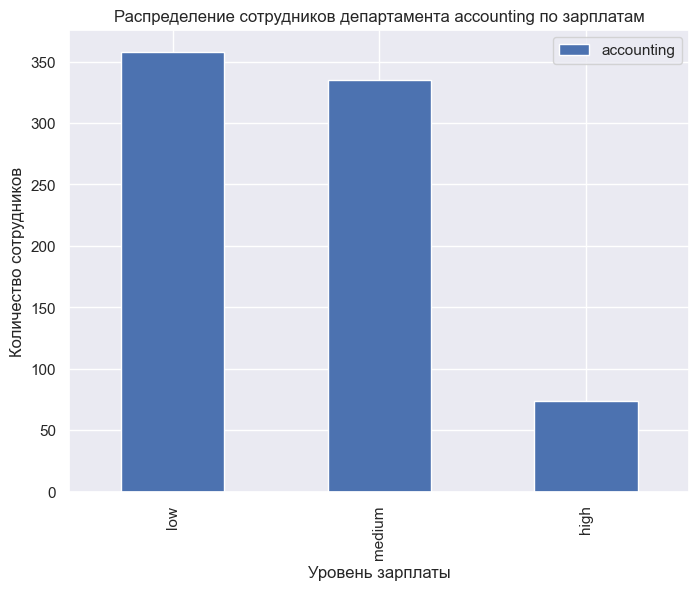

In [34]:
df_salary_acc.sort_values(by='accounting', ascending=False).plot(kind='bar',
                                                         title='Распределение сотрудников департамента accounting по зарплатам',
                                                         xlabel='Уровень зарплаты',
                                                         ylabel='Количество сотрудников')
#for i, val in enumerate(df_salary_sales.values):
    #plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

In [35]:
df_salary_dep_hr = df_HR[df_HR['department'] == 'hr']
df_salary_hr = df_salary_dep_hr[['salary', 'department']].groupby('salary').count()
df_salary_hr.rename(columns = {'department' : 'hr'}, inplace = True)
df_salary_hr

,hr
salary,
high,45
low,335
medium,359


<Axes: title={'center': 'Распределение сотрудников департамента hr по зарплатам'}, xlabel='Уровень зарплаты', ylabel='Количество сотрудников'>

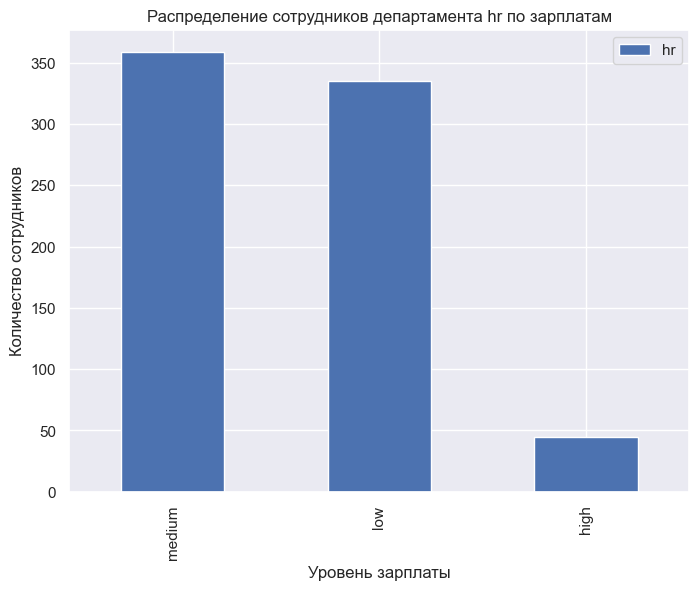

In [36]:
df_salary_hr.sort_values(by='hr', ascending=False).plot(kind='bar',
                                                         title='Распределение сотрудников департамента hr по зарплатам',
                                                         xlabel='Уровень зарплаты',
                                                         ylabel='Количество сотрудников')
#for i, val in enumerate(df_salary_sales.values):
    #plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

In [37]:
df_salary_dep_manag = df_HR[df_HR['department'] == 'management']
df_salary_manag = df_salary_dep_manag[['salary', 'department']].groupby('salary').count()
df_salary_manag.rename(columns = {'department' : 'management'}, inplace = True)
df_salary_manag

,management
salary,
high,225
low,180
medium,225


<Axes: title={'center': 'Распределение сотрудников департамента management по зарплатам'}, xlabel='Уровень зарплаты', ylabel='Количество сотрудников'>

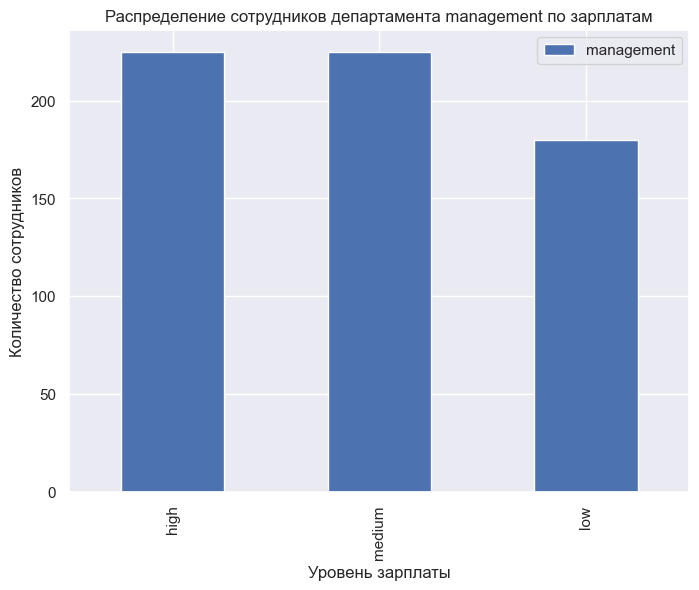

In [38]:
df_salary_manag.sort_values(by='management', ascending=False).plot(kind='bar',
                                                         title='Распределение сотрудников департамента management по зарплатам',
                                                         xlabel='Уровень зарплаты',
                                                         ylabel='Количество сотрудников')
#for i, val in enumerate(df_salary_sales.values):
    #plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [39]:
"""
Отфильтруем основной датафрейм df_HR для сотрудников с высокой и низкой зарплатой. 
Сформируем списки значений average_montly_hours для каждого из уровней окладов.
"""
df_high_sal = df_HR[df_HR['salary'] == 'high']
df_high_salary = list(df_high_sal['average_montly_hours'])

df_low_sal = df_HR[df_HR['salary'] == 'low']
df_low_salary = list(df_low_sal['average_montly_hours'])

In [40]:
import scipy.stats as stats
"""
Выполним проверку гипотезы. Определим:
Нулевая гипотеза: сотрудники с высокими и низкими salary имеют равное среднее кол-во часов на рабочем месте в месяц
Альтернативная гипотеза: сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
Примем уровень значимости α = 0.05
"""
stats.ttest_ind (a=df_high_salary, b=df_low_salary)

Ttest_indResult(statistic=-0.7288680398062308, pvalue=0.4661023478267259)

Получаем, что значение pvalue = 0.466 больше уровня значимости 0.05. Следовательно, мы не отклоняем нулевую гипотезу. У нас
нет доказательств того, что сотрудники с высоким и низким окладом проводят на работе разное количество времени.

8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

● Доля сотрудников с повышением за последние 5 лет

● Средняя степень удовлетворенности

● Среднее количество проектов

а) Среди уволившихся сотрудников:

In [41]:
#Сформируем датафрейм с уволившимися сотрудниками
df_left = df_HR[df_HR['left'] == 1]
df_left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [42]:
#Доля сотрудников с повышением за последние 5 лет: отношение кол-ва сотрудников с повышением к общему кол-ву вычитаем из 1
left_prom_last5years = 1 - ((len(df_left[df_left['promotion_last_5years'] == 0]))/3571)
left_prom_last5years

0.005320638476617234

In [43]:
#Средняя степень удовлетворенности
mean_udovl_left = df_left['satisfaction_level'].mean().round(4)
mean_udovl_left

0.4401

In [44]:
#Среднее количество проектов
mean_count_proj_left = df_left['number_project'].mean().round(0)
mean_count_proj_left

4.0

б) Среди не уволившихся сотрудников:

In [45]:
#Сформируем датафрейм, в котором отсутствуют уволившиеся сотрудники
df_not_left = df_HR[df_HR['left'] == 0]
df_not_left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [46]:
#Доля сотрудников с повышением за последние 5 лет: отношение кол-ва сотрудников с повышением к общему кол-ву вычитаем из 1
not_left_prom_last5years = 1 - ((len(df_not_left[df_not_left['promotion_last_5years'] == 0]))/11428)
not_left_prom_last5years

0.026251312565628293

In [47]:
#Средняя степень удовлетворенности
mean_udovl_not_left = df_not_left['satisfaction_level'].mean().round(4)
mean_udovl_not_left

0.6668

In [48]:
#Среднее количество проектов
mean_count_proj_not_left = df_not_left['number_project'].mean().round(0)
mean_count_proj_not_left

4.0

9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке

In [62]:
X = df_HR[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = pd.array(df_HR['left'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Вводим переменную-модель lda
lda = LinearDiscriminantAnalysis()

In [63]:
#Обучение модели: она будет подбирать разделяющие (дискриминантные) линии между классами
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [64]:
#Прогноз класса для прогнозной выборки, на которой проверяем качество модели
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [65]:
#Выведем разницу между фактическими и прогнозными значениями
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
3745,0,0
3746,1,0
3747,0,0
3748,0,1


In [67]:
"""
Оценка модели по прогнозам при наличии фактических значений: используем показатель точности accuracy
Это отношение правильных ответов модели к общему количеству прогнозных значений
"""
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7536

Таким образом, видим, что наша модель обучена недостаточно хорошо: только 75% данных она спрогнозировала корректно.

In [68]:
#Извлекаем из построенной модели коэфф-ы дискриминантных линий:
lda.coef_

array([[-4.58366087e+00,  6.57019075e-01, -2.18430857e-01,
         4.47682750e-03,  2.22165799e-01, -1.04525663e+00,
        -1.10730495e+00]])

In [112]:
#Визуализируем дискриминантные линии только по 2 признакам
small_train = X_train[['average_montly_hours', 'satisfaction_level']]
small_test = X_test[['average_montly_hours', 'satisfaction_level']]

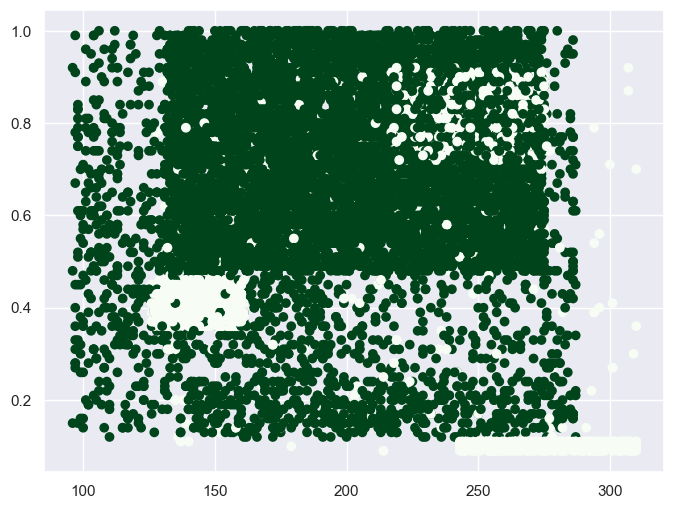

In [115]:
plt.scatter(x=small_train['average_montly_hours'], y=small_train['satisfaction_level'], c=y_train, cmap='Greens_r')

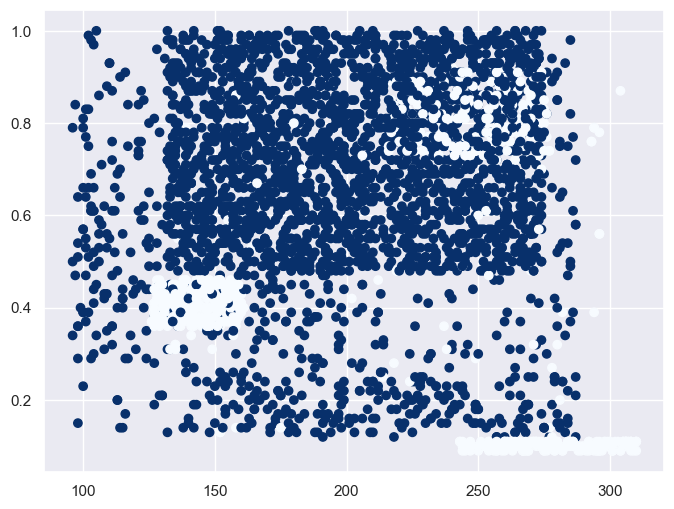

In [103]:
plt.scatter(x=small_test['average_montly_hours'], y=small_test['satisfaction_level'], c=y_test, cmap='Blues_r')

Видим, что и для значений тестовой выборки, и для прогнозных значений свойственно: при разбросе average_montly_hours от 140 до 275 часов в месяц сотрудники в большей мере удовлетворены своей работой - преимущественно satisfaction_level в пределах от 0.5 до 1.0. При этом, достаточно мало значений satisfaction_level в пределах от 0.25 до 0.5, а вот значения до 0.25 встречаются на графике чаще - даже при неизменных пределах average_montly_hours. Поэтому нельзя однозначно утверждать о положительном или отрицательном направлении корреляции, ровно как и о высоких её значениях.

In [75]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, y_train)
# Выведем значения центроидов и отобразим на визуализации
lda_small.means_

array([[198.83183673,   0.66827755],
       [207.74495138,   0.43747195]])

In [76]:
y_train

<PandasArray>
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
 ...
 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Length: 11249, dtype: int64

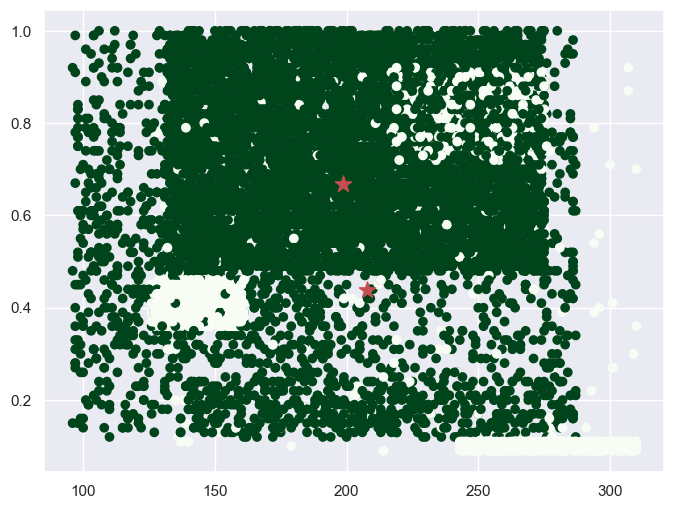

In [116]:
#визуализация разделения на существующих значениях
plt.scatter(small_train['average_montly_hours'], small_train['satisfaction_level'], c=y_train, cmap='Greens_r')
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

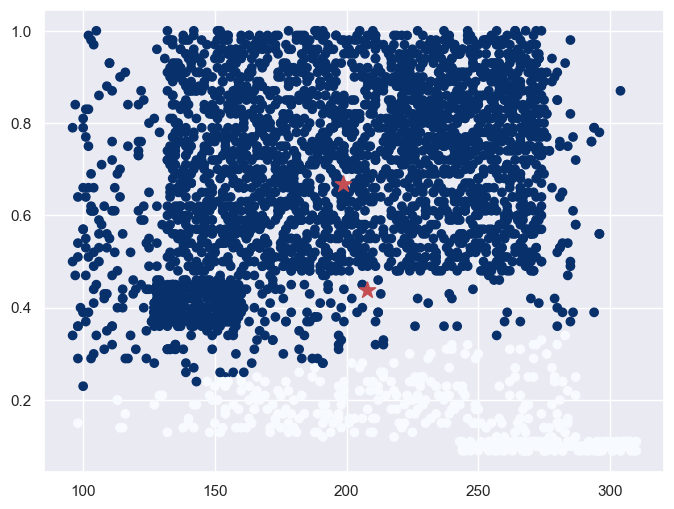

In [110]:
#визуализация разделения на прогнозных значениях
plt.scatter(small_test['average_montly_hours'], small_test['satisfaction_level'], c=lda_small.predict(small_test), cmap='Blues_r')
#центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

In [105]:
lda_small.coef_

array([[ 3.72388084e-03, -4.43035708e+00]])

In [106]:
#Таким образом, accuracy модели lda_small для двух признаков average_montly_hours, satisfaction_level
accuracy_score(y_test, lda_small.predict(small_test))

0.7517333333333334

Точность модели осталась практически такой же - 75%. Т.е модель, основанная на всех признаках (кроме department и salary) выдаёт точность, тождественно равную модели, основанную всего на 2 признаках average_montly_hours, satisfaction_level.

In [108]:
#Рассчитаем корреляцию для 2 признаков
df_HR[['average_montly_hours', 'satisfaction_level']].corr()

,average_montly_hours,satisfaction_level
average_montly_hours,1.000000,-0.020048
satisfaction_level,-0.020048,1.000000


Получаем довод для гипотезы о невысоком значении корреляции, сформулированной после визуализации модели lda_small. Знак показывает обратную связь корреляции.